# Regression - Laptop Price Prediction System

In [38]:
import numpy as np
import pandas as pd
from pycaret.regression import *

In [39]:
df_lap_price = pd.read_csv('laptops.csv', encoding='ISO-8859-1', index_col=False)

In [40]:
df_lap_price.head(10)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [41]:
df_lap_price.shape

(1303, 13)

In [42]:
df_lap_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [43]:
experiment_reg = setup(data = df_lap_price, 
                   target = 'Price_euros',
                   silent = True)

,Description,Value
0,session_id,2601
1,Target,Price_euros
2,Original Data,"(1303, 13)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(912, 826)"


In [44]:
best_model_reg = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,197.3478,83452.0652,286.8754,0.8040,0.2738,0.2097,0.0260
rf,Random Forest Regressor,197.2732,94668.9842,304.5064,0.7758,0.2402,0.1868,0.3780
gbr,Gradient Boosting Regressor,213.9885,96487.0298,307.8310,0.7746,0.2668,0.2240,0.2960
llar,Lasso Least Angle Regression,233.3153,108175.1280,326.9000,0.7454,0.3059,0.2644,0.6160
et,Extra Trees Regressor,206.2517,108784.2088,326.9794,0.7401,0.2577,0.1909,0.5350
ridge,Ridge Regression,240.4229,117426.7711,337.0494,0.7378,0.3720,0.2702,0.0840
omp,Orthogonal Matching Pursuit,220.8163,118296.6988,339.9840,0.7219,0.3290,0.2263,0.0290
lightgbm,Light Gradient Boosting Machine,233.4855,133378.9248,356.4974,0.7119,0.2870,0.2338,0.0440
huber,Huber Regressor,246.6626,166258.7272,389.8342,0.6607,0.3612,0.2385,0.4710
dt,Decision Tree Regressor,241.6666,146340.6737,378.5313,0.6565,0.2999,0.2228,0.0270


In [45]:
lasso_regression  = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,180.5459,67300.6328,259.4236,0.8296,0.2247,0.1810
1,205.9441,136379.4062,369.2958,0.6856,0.2524,0.1963
2,207.3293,85338.0078,292.1267,0.8826,0.2830,0.2415
3,196.5092,77612.9141,278.5909,0.8340,0.2309,0.1790
4,190.6245,81941.7969,286.2548,0.7770,0.2913,0.2195
5,210.6243,85328.0156,292.1096,0.8589,0.3594,0.2363
6,197.7911,71662.4688,267.6985,0.7819,0.2968,0.2018
7,167.4338,55024.4883,234.5730,0.8787,0.2344,0.1841
8,197.1296,76268.8125,276.1681,0.8321,0.3010,0.2244


In [46]:
lasso_regression

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=2601,
      selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
tuned_lasso = tune_model(lasso_regression)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,169.5489,62143.0820,249.2851,0.8427,0.2115,0.1657
1,189.0159,138726.1406,372.4596,0.6801,0.2363,0.1737
2,192.6577,74568.9922,273.0732,0.8974,0.2731,0.2223
3,189.5024,80339.5000,283.4422,0.8282,0.2269,0.1713
4,166.4371,75382.1797,274.5582,0.7949,0.2389,0.1830
5,184.7708,67444.2891,259.7004,0.8885,0.2953,0.2024
6,171.1573,59684.2070,244.3035,0.8183,0.2572,0.1742
7,157.5379,55617.9219,235.8345,0.8773,0.2317,0.1768
8,179.6272,78815.7109,280.7414,0.8265,0.2819,0.2123


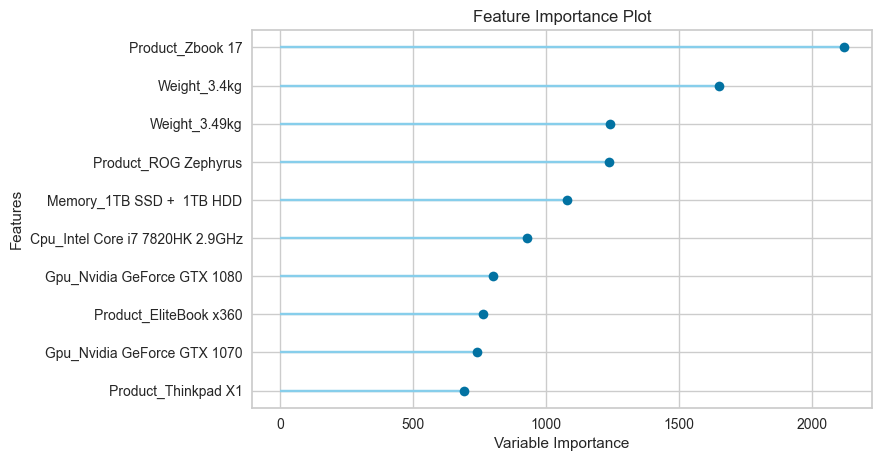

In [48]:
plot_model(estimator = tuned_lasso, plot = 'feature')

In [49]:
evaluate_model(tuned_lasso)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [50]:
predict_df_lap = pd.read_csv('laptops.csv', encoding='ISO-8859-1', index_col=False)
predict_df_lap.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1049,1063,Asus,Chromebook C202SA,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.2kg,287.90
164,168,Acer,Aspire A315-31,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,Windows 10,2.1kg,348.00
927,941,HP,Probook 650,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.31kg,1165.00
866,877,Toshiba,Portégé Z30-C-188,Ultrabook,13.3,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,1095.00
339,345,Dell,Inspiron 7570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce 940MX,Windows 10,2kg,1142.75


In [51]:
prediction_reg = predict_model(tuned_lasso, data = predict_df_lap)
prediction_reg.tail()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,147.3121,54485.0096,233.4202,0.8884,0.2282,0.1573


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Label
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.0,856.763916
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.0,1576.963379
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0,282.064575
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.0,638.776611
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,369.0,432.538757


In [52]:
save_model(tuned_lasso, model_name = 'Lasso Regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='Price_euros', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                 ('fix_perfect', Remove_100(target='Price_euros')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
        

In [53]:
model_reg = load_model('Lasso Regression')

Transformation Pipeline and Model Successfully Loaded


In [54]:
model_reg.predict(predict_df_lap.head(10))

array([1420.1317 , 1146.7856 ,  739.5251 , 2318.689  , 1584.8396 ,
        420.5384 , 2049.522  , 1147.1881 , 1566.7115 ,  961.70966],
      dtype=float32)

In [55]:
Gradient_Boosting_Reg = create_model('gbr');          
blend_reg = blend_models(estimator_list=[tuned_lasso,Gradient_Boosting_Reg])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,174.4664,65014.8318,254.9801,0.8354,0.2221,0.1765
1,198.7867,139529.1828,373.5361,0.6783,0.2497,0.1889
2,197.8384,76621.6619,276.8062,0.8946,0.2720,0.2280
3,194.7174,78256.5509,279.7437,0.8326,0.2232,0.1767
4,175.8472,71563.6501,267.5138,0.8053,0.2448,0.1966
5,177.0355,63824.3276,252.6348,0.8945,0.2421,0.1946
6,183.9625,61780.1552,248.5561,0.8119,0.2196,0.1854
7,154.9013,52682.4338,229.5265,0.8838,0.2310,0.1768
8,184.0213,69533.7807,263.6926,0.8470,0.2519,0.2076


# Classification - Diabetes Prediction System

In [56]:
import numpy as np
import pandas as pd
from pycaret.classification import *

In [57]:
df_diabetes = pd.read_csv('diabetes.csv')

In [58]:
df_diabetes.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
454,2,100,54,28,105,37.8,0.498,24,0
226,0,101,76,0,0,35.7,0.198,26,0
323,13,152,90,33,29,26.8,0.731,43,1
394,4,158,78,0,0,32.9,0.803,31,1
482,4,85,58,22,49,27.8,0.306,28,0


In [59]:
df_diabetes.shape

(768, 9)

In [60]:
df_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [61]:
experiment = setup(data = df_diabetes, 
                   target = 'Outcome',
                   silent = True)

,Description,Value
0,session_id,2312
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [62]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7596,0.8154,0.5447,0.7152,0.6143,0.4446,0.4559,0.0380
gbc,Gradient Boosting Classifier,0.7578,0.8189,0.6032,0.6804,0.6350,0.4556,0.4606,0.0260
ridge,Ridge Classifier,0.7577,0.0000,0.5336,0.7171,0.6056,0.4370,0.4506,0.0030
rf,Random Forest Classifier,0.7540,0.8089,0.5608,0.6861,0.6140,0.4370,0.4435,0.0590
lda,Linear Discriminant Analysis,0.7540,0.8128,0.5284,0.7089,0.5992,0.4282,0.4413,0.0040
lightgbm,Light Gradient Boosting Machine,0.7468,0.7928,0.6193,0.6481,0.6298,0.4382,0.4413,0.0110
ada,Ada Boost Classifier,0.7316,0.7861,0.5713,0.6488,0.5973,0.3989,0.4072,0.0220
et,Extra Trees Classifier,0.7223,0.7869,0.4658,0.6532,0.5385,0.3493,0.3620,0.0600
knn,K Neighbors Classifier,0.7187,0.7406,0.5395,0.6239,0.5744,0.3662,0.3715,0.0070
dt,Decision Tree Classifier,0.7001,0.6649,0.5456,0.5799,0.5550,0.3318,0.3358,0.0030


In [63]:
logistic_regression  = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8391,0.5789,0.7333,0.6471,0.4882,0.4954
1,0.7778,0.8316,0.5789,0.7333,0.6471,0.4882,0.4954
2,0.7593,0.8075,0.5789,0.6875,0.6286,0.4524,0.4561
3,0.8148,0.8977,0.5789,0.8462,0.6875,0.5624,0.5828
4,0.7222,0.8241,0.3684,0.7000,0.4828,0.3170,0.3476
5,0.7593,0.8211,0.6316,0.6667,0.6486,0.4658,0.4661
6,0.7778,0.7955,0.5789,0.7333,0.6471,0.4882,0.4954
7,0.7925,0.8016,0.5000,0.8182,0.6207,0.4890,0.5171
8,0.7736,0.7895,0.5789,0.7333,0.6471,0.4838,0.4911


In [64]:
logistic_regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2312, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
tuned_lr = tune_model(logistic_regression)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8376,0.5789,0.7333,0.6471,0.4882,0.4954
1,0.7593,0.8331,0.5789,0.6875,0.6286,0.4524,0.4561
2,0.7778,0.8120,0.5789,0.7333,0.6471,0.4882,0.4954
3,0.8148,0.8857,0.5789,0.8462,0.6875,0.5624,0.5828
4,0.7222,0.8271,0.3684,0.7000,0.4828,0.3170,0.3476
5,0.7407,0.8135,0.5789,0.6471,0.6111,0.4176,0.4190
6,0.7593,0.7880,0.5263,0.7143,0.6061,0.4384,0.4490
7,0.7736,0.8222,0.4444,0.8000,0.5714,0.4342,0.4688
8,0.7547,0.7926,0.5263,0.7143,0.6061,0.4339,0.4445


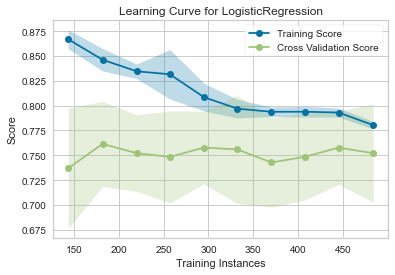

In [66]:
plot_model(estimator = tuned_lr, plot = 'learning')

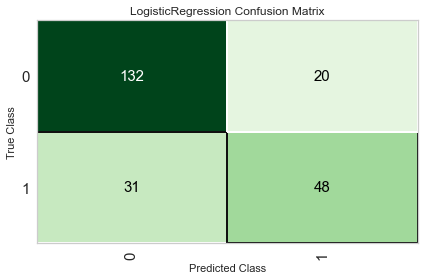

In [67]:
plot_model(estimator = tuned_lr, plot = 'confusion_matrix')

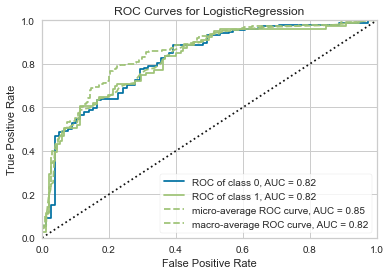

In [68]:
plot_model(estimator = tuned_lr, plot = 'auc')

In [69]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [70]:
predict_df = pd.read_csv('diabetes.csv')
predict_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [71]:
prediction = predict_model(tuned_lr, data = predict_df)
prediction.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7812,0.8371,0.5709,0.7427,0.6456,0.4913,0.5002


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Label,Score
0,6,148,72,35,0,33.6,0.627,50,1,1,0.6753
1,1,85,66,29,0,26.6,0.351,31,0,0,0.9503
2,8,183,64,0,0,23.3,0.672,32,1,1,0.8403
3,1,89,66,23,94,28.1,0.167,21,0,0,0.9685
4,0,137,40,35,168,43.1,2.288,33,1,1,0.9491


In [72]:
save_model(tuned_lr, model_name = 'Logistic Regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Outcome',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=8.826, class_weight={}, dual=False,
                 

In [73]:
load_model('Logistic Regression')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Outcome',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 LogisticRegression(C=8.826, class_weight={}, dual=False,
                                  

In [74]:
model = load_model('Logistic Regression')

Transformation Pipeline and Model Successfully Loaded


In [75]:
model.predict(predict_df.head(10))

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [76]:
random_forest  = create_model('rf');          
blend = blend_models(estimator_list=[tuned_lr,random_forest])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8331,0.6316,0.7059,0.6667,0.5008,0.5025
1,0.7593,0.8195,0.5789,0.6875,0.6286,0.4524,0.4561
2,0.7963,0.8526,0.5789,0.7857,0.6667,0.5248,0.5375
3,0.8148,0.9203,0.5789,0.8462,0.6875,0.5624,0.5828
4,0.7593,0.8211,0.4211,0.8000,0.5517,0.4081,0.4474
5,0.7593,0.8286,0.6316,0.6667,0.6486,0.4658,0.4661
6,0.7407,0.7910,0.5789,0.6471,0.6111,0.4176,0.4190
7,0.7925,0.8190,0.5556,0.7692,0.6452,0.5038,0.5172
8,0.7736,0.8220,0.6316,0.7059,0.6667,0.4960,0.4978
